# Tâche 8 : Analyse de la structure de bande électronique

### Chargement des packages et du matériau

In [15]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

with MPRester("aCXeRIqRipXfPPtsLI7") as m:

    # Structure for material id
    structure = m.get_bandstructure_by_material_id("mp-961675")
    

### Visualisation de la structure de bande et de la zone de Broullouin

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

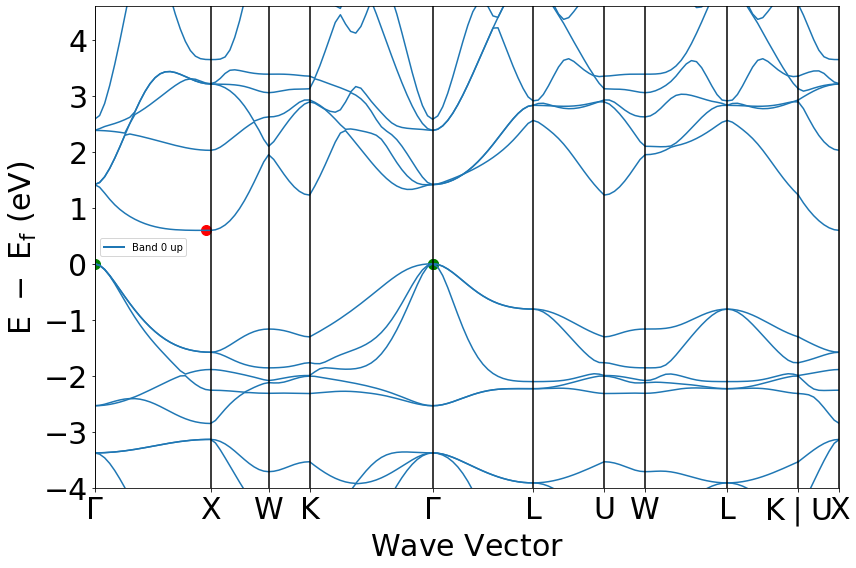

In [16]:
plot = BSPlotter(structure)
plot.get_plot(vbm_cbm_marker=True)

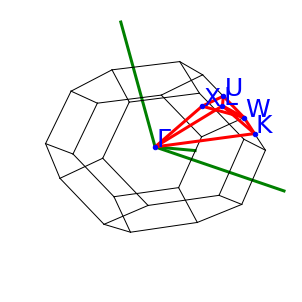

In [17]:
BSPlotter(structure).plot_brillouin()

### Détermination de la bande interdite

In [18]:
gap = structure.get_band_gap()
e_band = gap.get('energy')
print('L énergie de la bande interdite vaut :', e_band, 'eV.\n')
print('Le gap est indirect, les extremums des bandes de conduction et de valence ne correspondent pas au même vecteur d onde de la zone de Brillouin\n')
print("Le vecteur de transition entre les deux extremum est le vecteur ", gap['transition'])

L énergie de la bande interdite vaut : 0.5959000000000003 eV.

Le gap est indirect, les extremums des bandes de conduction et de valence ne correspondent pas au même vecteur d onde de la zone de Brillouin

Le vecteur de transition entre les deux extremum est le vecteur  \Gamma-(0.478,0.000,0.478)


### Identification des bandes limites

In [23]:
bs = BSPlotter(structure)
data = bs.bs_plot_data()

vbm = structure.get_vbm()
print("La dernière bande de valence est la : ",str(vbm.get('band_index')))

cbm = structure.get_cbm()
print("La première bande de conduction est la : ",str(cbm.get('band_index')),"\n")
print("Avec ces information, nous pouvons calculer les pentes pour chacune des bandes limites pour déterminer là ou il y a le plus de dispertion")

La dernière bande de valence est la :  defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})
La première bande de conduction est la :  defaultdict(<class 'list'>, {<Spin.up: 1>: [16]}) 

Avec ces information, nous pouvons calculer les pentes pour chacune des bandes limites pour déterminer là ou il y a le plus de dispertion


In [26]:
#on calcule la dernière (première) bande de valence (conduction) 

distances = data.get('distances')
energy = data.get('energy') 

#[valeur, index]
val_max = [0,0]
val_min = [1000,0]
cond_max = [0,0]
cond_min = [1000,0]

for i in range(0,len(distances)):
    #calcul des pentes les plus ( et moins) fortes dans la bande de valence ( et conduction)
    slope_val = abs(energy["1"][i][15][-1]-energy["1"][i][15][0])/(distances[i][-1]-distances[i][0])
    slope_cond = abs(energy["1"][i][16][-1]-energy["1"][i][16][0])/(distances[i][-1]-distances[i][0])
    
    
    if(slope_val> val_max[0]):
        val_max[0] = slope_val
        val_max[1] = i
        
    if(slope_val< val_min[0]):
        val_min[0] = slope_val
        val_min[1] = i
        
    if(slope_cond > cond_max[0]):
        cond_max[0] = slope_cond
        cond_max[1] = i
        
    if(slope_cond < cond_min[0]):
        cond_min[0] = slope_cond
        cond_min[1] = i
        
        

### Plot de la structure de bande avec les flèches

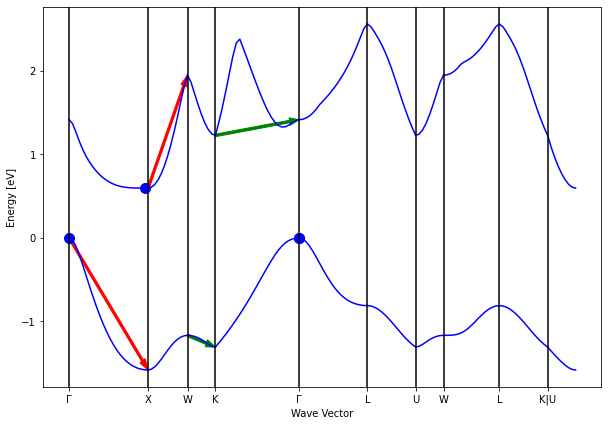

In [28]:
#dispersion max et min sur les bandes de valences et de conduction

Vbm = data.get("vbm")
Cbm = data.get("cbm")

figure,axes = plt.subplots(1,1,figsize=(10,7))

for i in range(0, len(distances)):
    plt.plot(distances[i],energy['1'][i][15],'b')
    plt.plot(distances[i],energy['1'][i][16],'b')
    
for i in range(0, len(Vbm)):
    x,y= Vbm[i]
    plt.plot(x, y, 'ob', markersize=10)
for i in range(0, len(Cbm)):
    x, y = Cbm[i]
    plt.plot(x ,y ,'ob',markersize=10)

plt.arrow(distances[cond_max[1]][0], energy["1"][cond_max[1]][16][0], distances[cond_max[1]][-1]-distances[cond_max[1]][0], energy["1"][cond_max[1]][16][-1]- energy["1"][cond_max[1]][16][0], color='red', width=0.03, length_includes_head=True)
plt.arrow(distances[cond_min[1]][0], energy["1"][cond_min[1]][16][0], distances[cond_min[1]][-1]-distances[cond_min[1]][0], energy["1"][cond_min[1]][16][-1]- energy["1"][cond_min[1]][16][0], color='green', width=0.03, length_includes_head=True)
plt.arrow(distances[val_max[1]][0], energy["1"][val_max[1]][15][0], distances[val_max[1]][-1]-distances[val_max[1]][0], energy["1"][val_max[1]][15][-1]- energy["1"][val_max[1]][15][0], color='red', width=0.03, length_includes_head=True)
plt.arrow(distances[val_min[1]][0], energy["1"][val_min[1]][15][0], distances[val_min[1]][-1]-distances[val_min[1]][0], energy["1"][val_min[1]][15][-1]- energy["1"][val_min[1]][15][0], color='green', width=0.03, length_includes_head=True)

#en rouge est la dispersion maximale
#en vert est la dispertion minimale

d = []
for i in range(0, len(distances)):
    d.append(distances[i][0])
    plt.axvline(distances[i][0],0,color="black")
    
axes.set_xticks(d)
axes.set_xticklabels(['Γ','X',"W",'K','Γ',"L",'U','W',"L",'K|U',])

axes.set_xlabel('Wave Vector')
axes.set_ylabel('Energy [eV]')

plt.show()